

```
1. Create an account on alphavantage.co
2. Get Alphavantage API key
3. Use Alphavantage to run stock market queries
4. Refer to https://www.alphavantage.co/documentation/' for supporting information
5. Fetch the required data using Alphavantage API
```



In [3]:
API_KEY = 'F716WXVDK2WEUT59'  # Replace with your actual Alpha Vantage API key

In [4]:
import requests
import pandas as pd


BASE_URL = 'https://www.alphavantage.co/query?'

def fetch_stock_data(symbol):
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if 'Time Series (Daily)' not in data:
        raise ValueError('Invalid API response. Check symbol or API limits.')

    ts_data = data['Time Series (Daily)']
    return ts_data

def transform_to_dataframe(ts_data):
    df = pd.DataFrame.from_dict(ts_data, orient='index')
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)
    df.sort_index(inplace=True)
    return df

# Usage example
if __name__ == "__main__":
    symbol = 'META'  # Example stock symbol
    try:
        raw_data = fetch_stock_data(symbol)
        stock_df = transform_to_dataframe(raw_data)
        print(stock_df)
    except ValueError as e:
        print(f'Error: {e}')


               Open      High       Low   Close      Volume
2025-06-11  703.705  708.8707  691.9900  694.14   9582508.0
2025-06-12  693.300  695.3800  687.0000  693.36   7322730.0
2025-06-13  687.950  694.5700  681.0100  682.87   9274441.0
2025-06-16  699.330  707.1500  693.5103  702.12  13720288.0
2025-06-17  702.000  705.9700  696.0600  697.23  10066110.0
...             ...       ...       ...     ...         ...
2025-10-27  749.730  755.7500  748.0100  750.82  11321080.0
2025-10-28  752.630  758.4000  745.5201  751.44  12193818.0
2025-10-29  754.750  759.1550  742.5100  751.67  26818592.0
2025-10-30  669.150  680.9599  650.1700  666.47  88440094.0
2025-10-31  674.510  674.8900  645.5700  648.35  56953169.0

[100 rows x 5 columns]


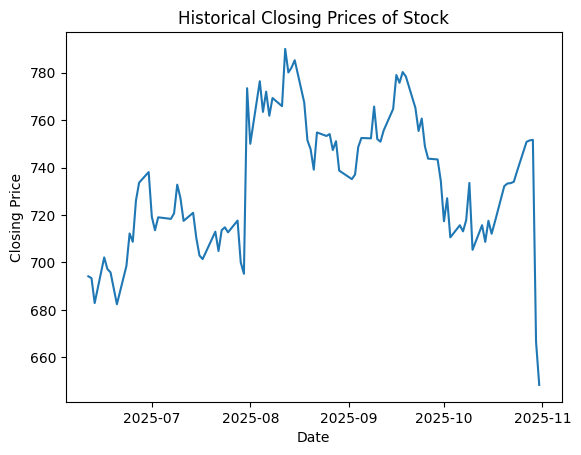

In [6]:
#1. Line Chart
#Visualizing Historical Closing Prices of a Stock
# Objective: To analyze how the stock price has changed over time — identify trends, volatility, and seasonality (Best Chart Types)
##Why:

##Time (on X-axis) and Closing Price (on Y-axis) naturally form a continuous time series.

#It clearly shows upward/downward trends, volatility, and patterns.
#Easy to compare multiple stocks using multiple lines.
#Candlestick Chart (OHLC chart)
#Why:
#Used in finance to show Open, High, Low, and Close (OHLC) prices in a compact format.
#It reveals both trend and market sentiment (bullish/bearish days).
#Typically used for detailed technical analysis, not just overall trend.
#Interpretation:
#Upward slope → Bullish trend.
#Downward slope → Bearish trend.
#Flat or zigzag → High volatility or consolidation phase.

import matplotlib.pyplot as plt

plt.plot(stock_df.index, stock_df['Close'])
plt.title('Historical Closing Prices of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [8]:
#2. Using a Box Plot to Compare Fluctuations of Daily Returns Between Two Stocks
#Objective:
#To compare daily return variability (i.e., how much each stock’s daily return fluctuates).
#Why Box Plot:
#Box plots summarize the entire distribution — median, quartiles, and outliers.
#They are excellent for comparing multiple groups (like two stocks) side by side.

 #Calculate daily return
stock_df['Daily Return'] = stock_df['Close'].pct_change()
display(stock_df.head())

,Open,High,Low,Close,Volume,Daily Return
2025-06-11,703.705,708.8707,691.9900,694.14,9582508.0,NaN
2025-06-12,693.300,695.3800,687.0000,693.36,7322730.0,-0.001124
2025-06-13,687.950,694.5700,681.0100,682.87,9274441.0,-0.015129
2025-06-16,699.330,707.1500,693.5103,702.12,13720288.0,0.028190
2025-06-17,702.000,705.9700,696.0600,697.23,10066110.0,-0.006965


/tmp/ipython-input-3719061664.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stock_df['Daily Return'].dropna(), stock_df2['Daily Return'].dropna()],


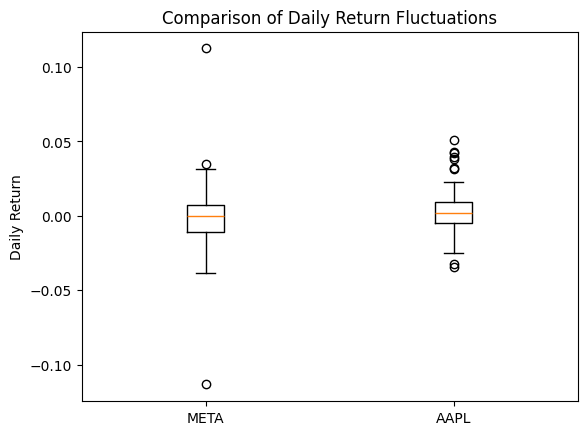

In [11]:
#Interpretation:
#Wider box or longer whiskers → Higher volatility (larger fluctuations).
#Narrower box → More stable returns.
#Outliers → Extreme market movements.
#Higher median → Better average performance.

plt.boxplot([stock_df['Daily Return'].dropna(), stock_df2['Daily Return'].dropna()],
            labels=[symbol, symbol2])
plt.title('Comparison of Daily Return Fluctuations')
plt.ylabel('Daily Return')
plt.show()

In [10]:
# Fetch data for a second stock (e.g., AAPL)
symbol2 = 'AAPL'
try:
    raw_data2 = fetch_stock_data(symbol2)
    stock_df2 = transform_to_dataframe(raw_data2)
    stock_df2['Daily Return'] = stock_df2['Close'].pct_change()
    display(stock_df2.head())
except ValueError as e:
    print(f'Error fetching data for {symbol2}: {e}')

,Open,High,Low,Close,Volume,Daily Return
2025-06-11,203.50,204.500,198.4100,198.78,60989857.0,NaN
2025-06-12,199.08,199.680,197.3601,199.20,43904635.0,0.002113
2025-06-13,199.73,200.370,195.7000,196.45,51447349.0,-0.013805
2025-06-16,197.30,198.685,196.5636,198.42,43020691.0,0.010028
2025-06-17,197.20,198.390,195.2100,195.64,38856152.0,-0.014011


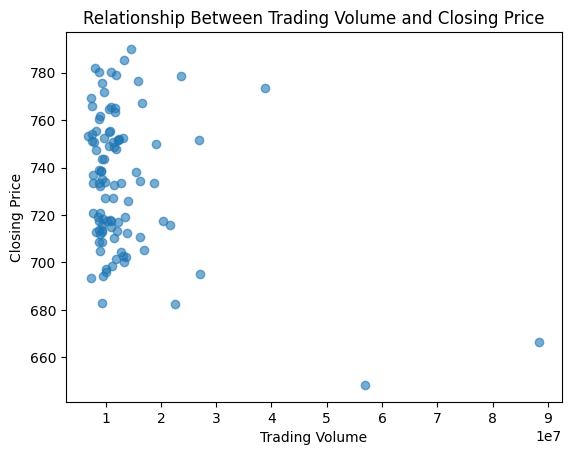

In [13]:
#3. Visualizing Relationship Between Trading Volume and Closing Price
# Objective:
#To check if volume impacts price movement — for example, do prices rise with higher volume?
#Best Chart Types:
#Scatter Plot
#Why:
#Ideal for showing the relationship (correlation) between two numeric variables.
#Each point represents a day with its Closing Price and Trading Volume.
#Patterns can indicate correlation type:
#Upward slope → Positive correlation (price rises with volume).
#Downward slope → Negative correlation.

plt.scatter(stock_df['Volume'], stock_df['Close'], alpha=0.6)
plt.title('Relationship Between Trading Volume and Closing Price')
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.show()

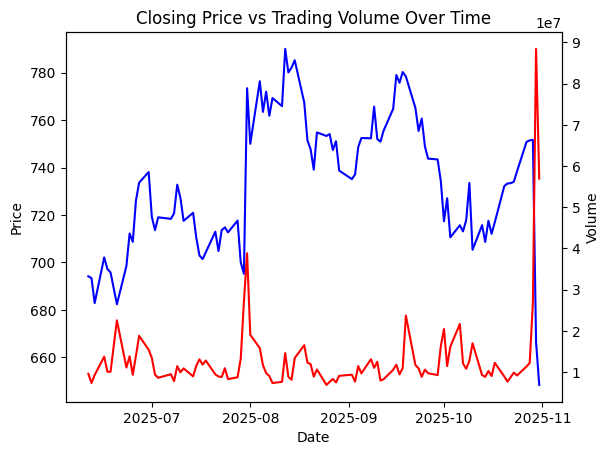

In [15]:
#Alternative: Dual-axis Line Chart
#Useful for showing how both variables move over time, especially for trend comparison:
fig, ax1 = plt.subplots()
ax1.plot(stock_df.index, stock_df['Close'], color='blue', label='Close Price')
ax2 = ax1.twinx()
ax2.plot(stock_df.index, stock_df['Volume'], color='red', label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Volume')
plt.title('Closing Price vs Trading Volume Over Time')
plt.show()


#Interpretation:
#Positive correlation: Price increases with high trading volume → strong market participation.
#Negative or no correlation: Price moves independently of volume → weak price-volume link.